The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Q2: Predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 656.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 11.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [4]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines (1).csv to gas_turbines (1).csv


In [5]:
gas=pd.read_csv('gas_turbines (1).csv')
gas

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [6]:
gas.shape

(15039, 11)

In [7]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [11]:
gas[gas.duplicated()].shape

(0, 11)

In [12]:
gas[gas.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [13]:
gas.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [14]:
gas.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [15]:
numerical_features = gas.describe(include=['int64','float64']).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

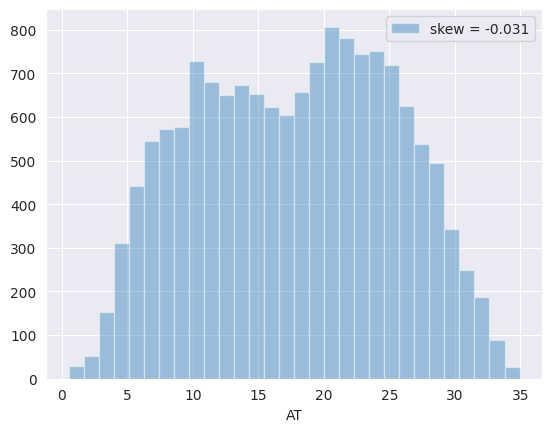

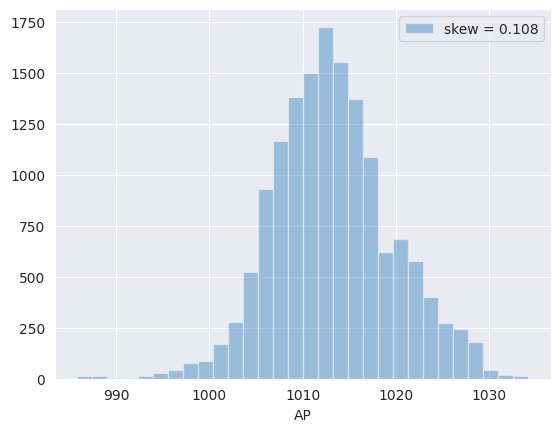

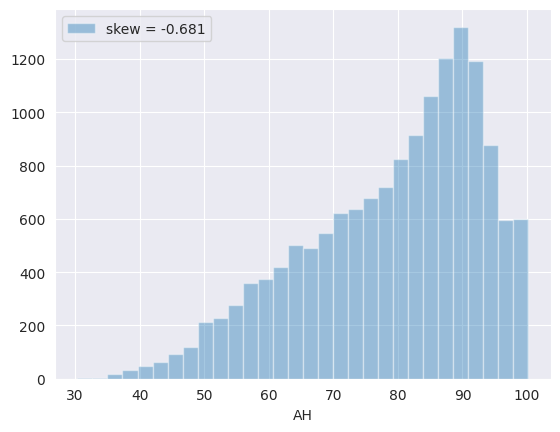

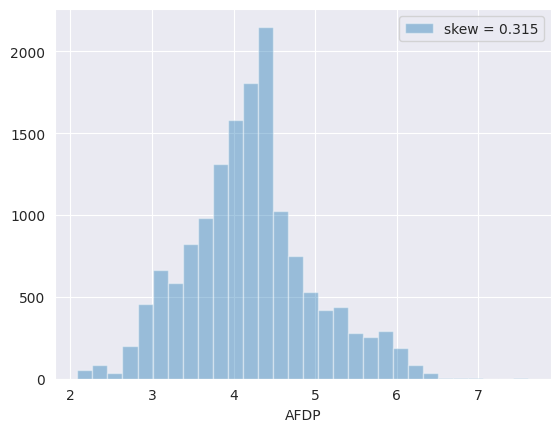

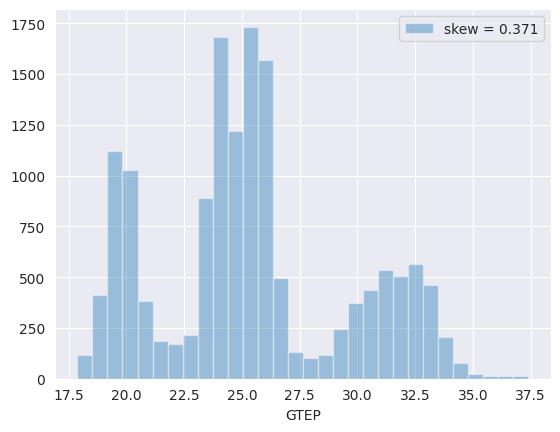

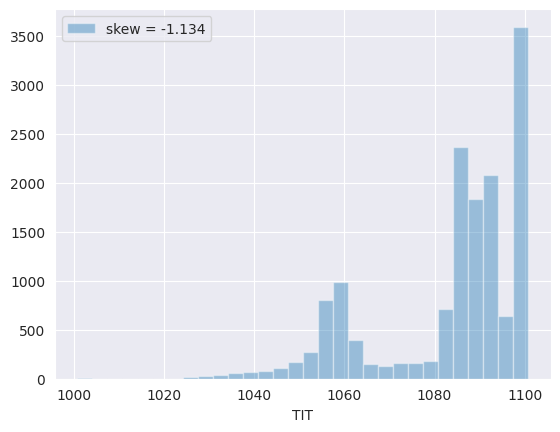

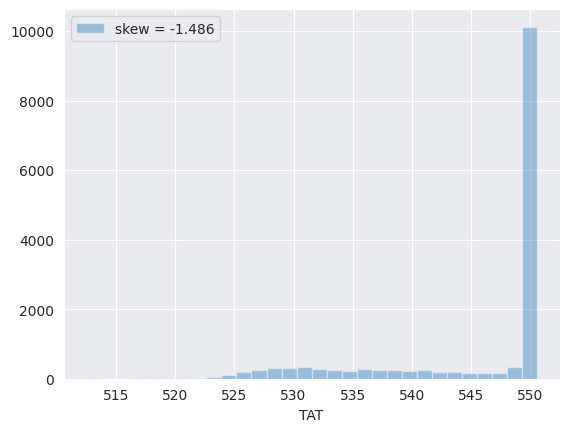

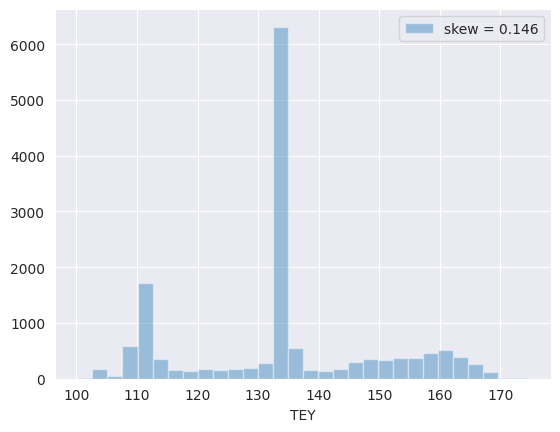

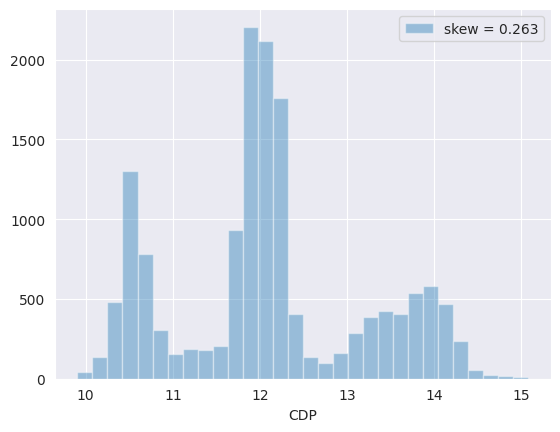

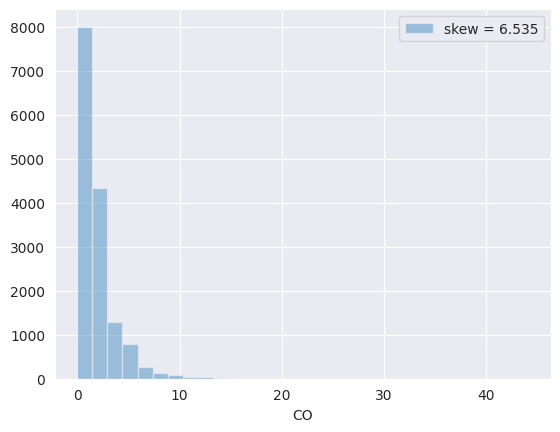

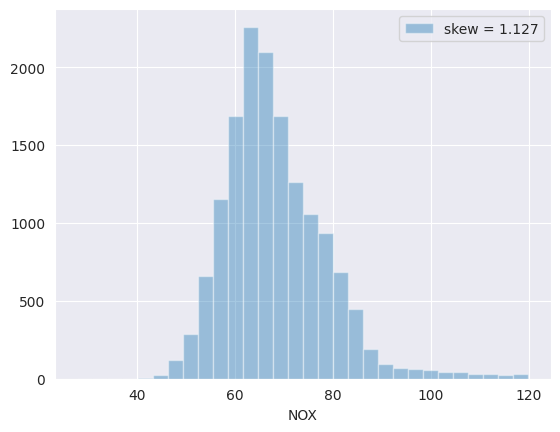

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
numerical_features = [feature for feature in gas.columns if gas[feature].dtypes != 'O']
for feat in numerical_features:
    skew = gas[feat].skew()
    sns.distplot(gas[feat],kde = False, label = 'skew = %.3f' %(skew),bins = 30)
    plt.legend(loc = 'best')
    plt.show()

In [18]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
from collections import Counter
# Detect observations with more than one outlier

def outlier_hunt(gas):
    """
    Takes a gasframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    for col in gas.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(gas[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(gas[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = gas[(gas[col] < Q1 - outlier_step) | (gas[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The gasset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas[numerical_features]))))

The gasset contains 1543 observations with more than 2 outliers


In [21]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

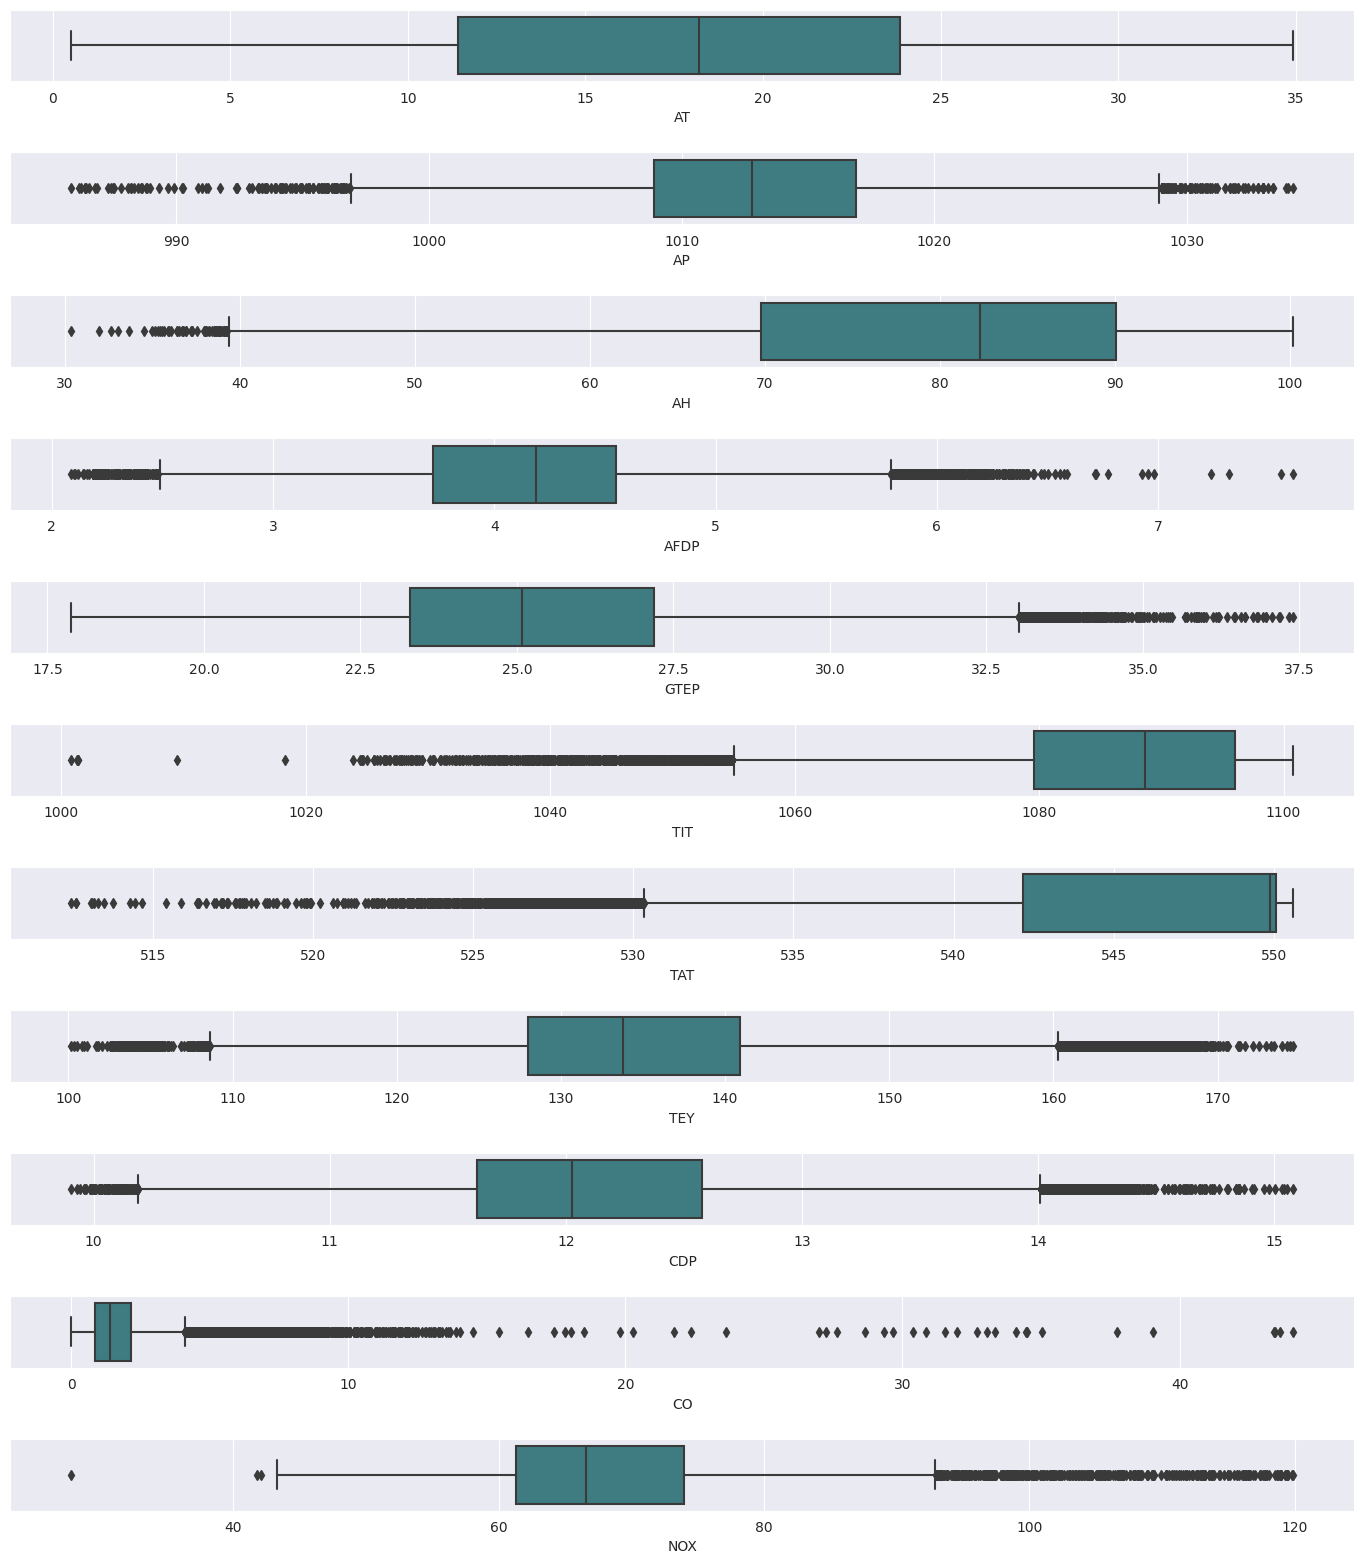

In [22]:
ot=gas.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

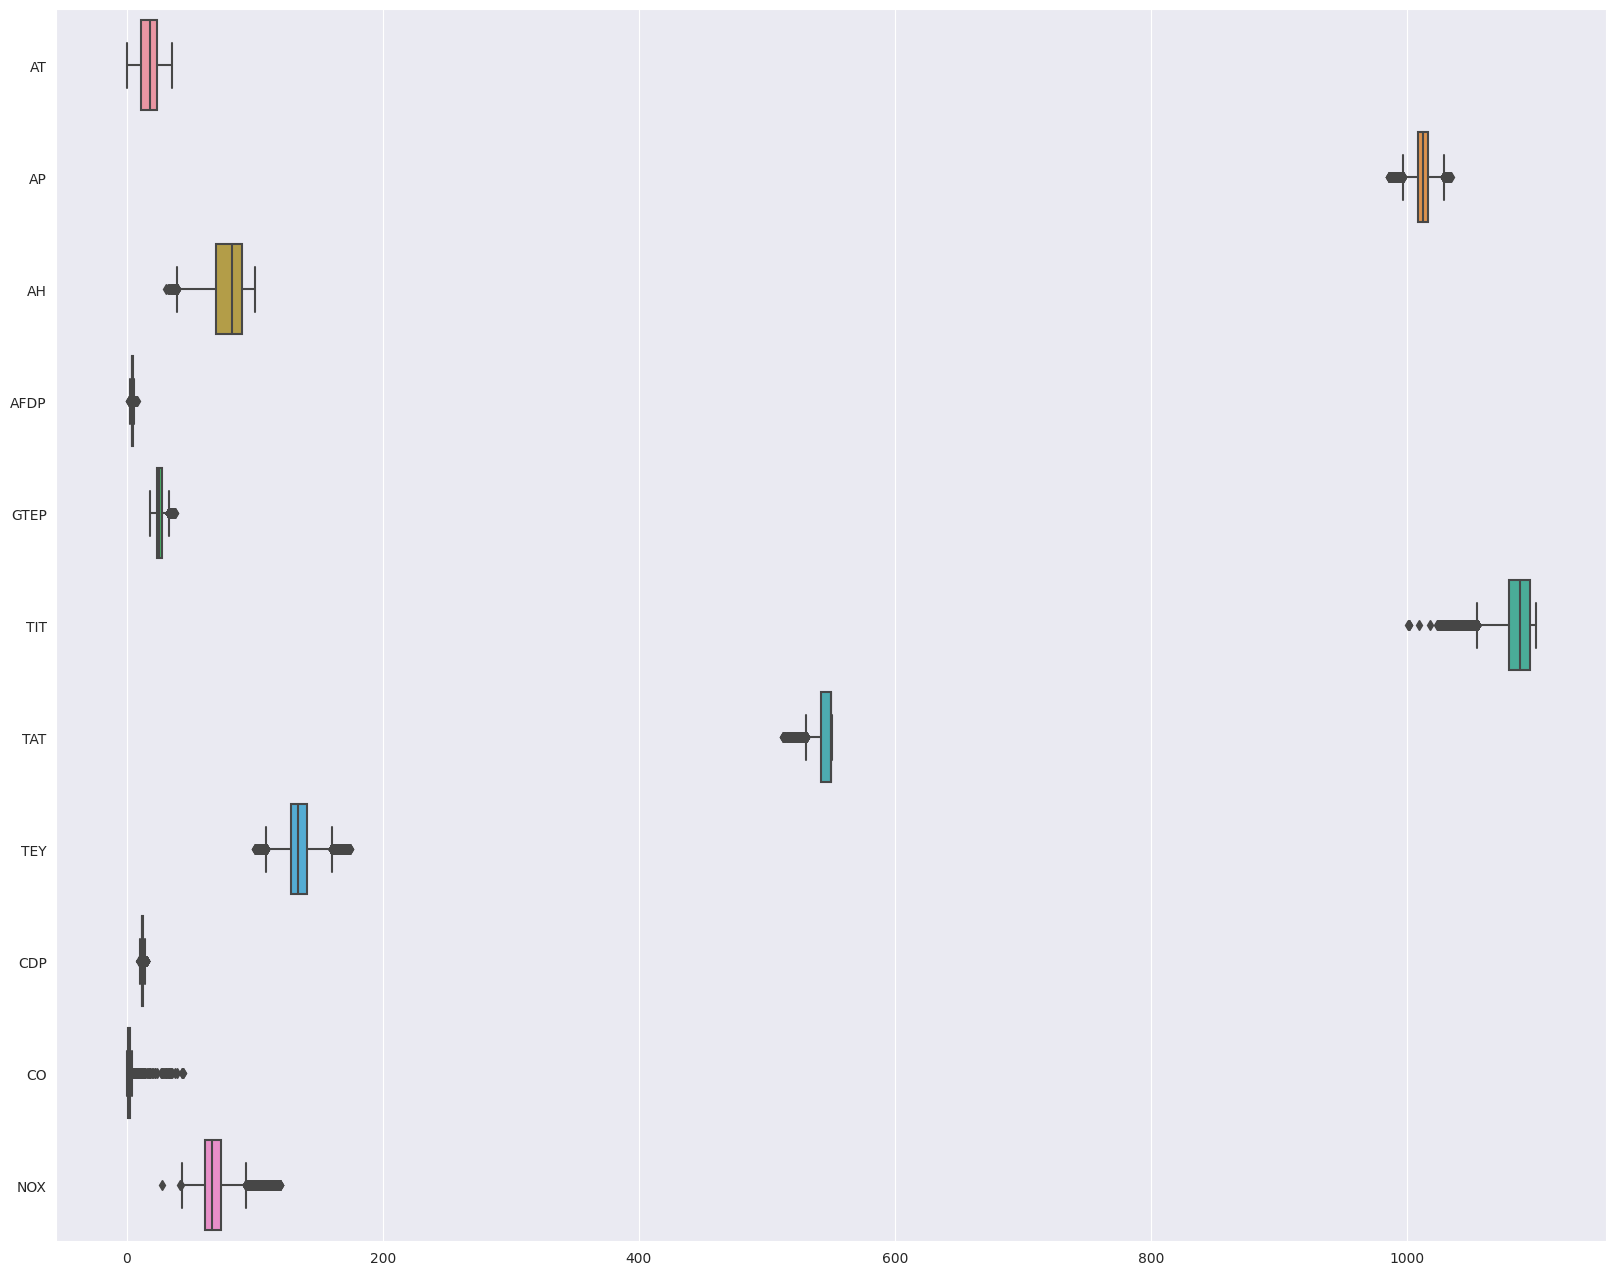

In [23]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=gas[numerical_features],orient = 'h')

Text(0.5, 1.0, 'Histogram of the Target Column')

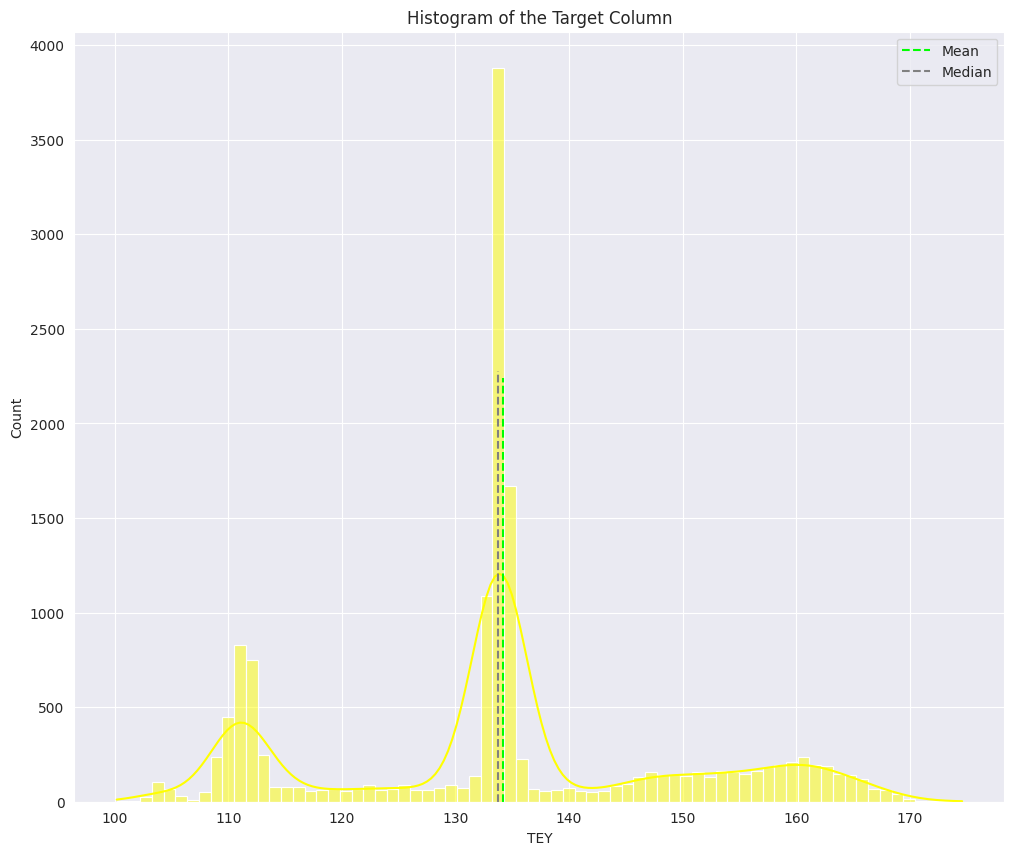

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=gas,x="TEY",color="yellow",kde=True)
plt.axvline(x=gas["TEY"].mean(),ymax=0.55,color="lime",linestyle='--',label="Mean")
plt.axvline(x=gas["TEY"].median(),ymax=0.56,color="grey",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'CUMULATIVE OF THE TARGET COLUMN')

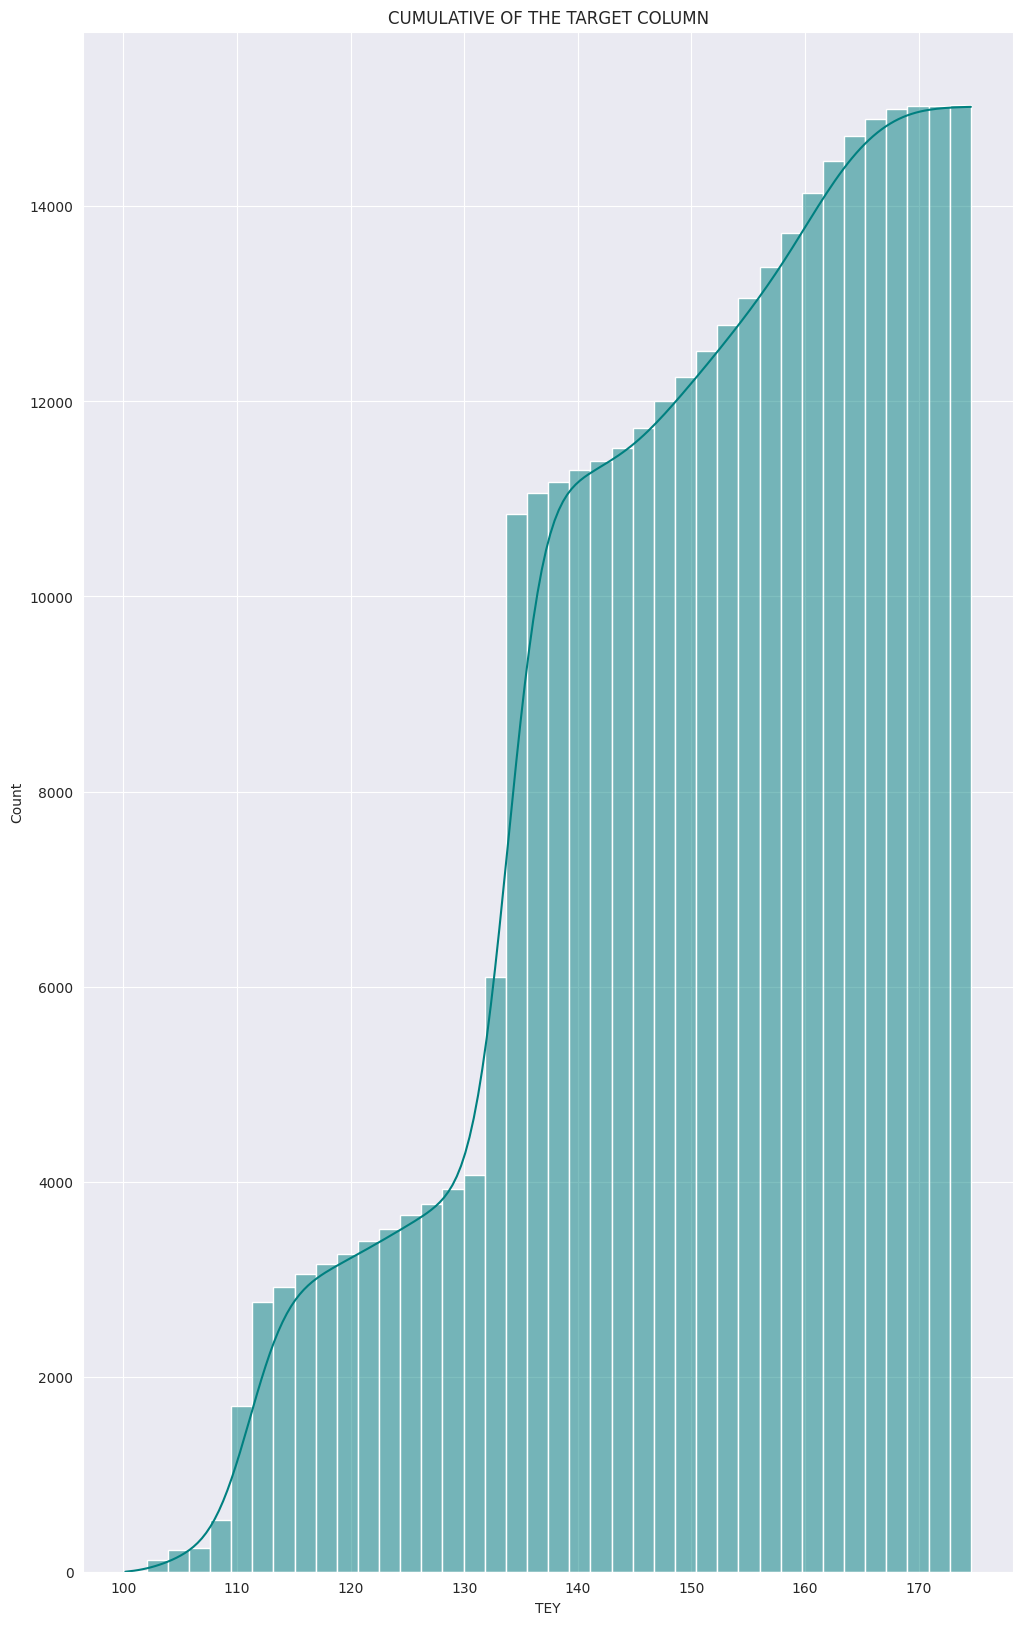

In [25]:
plt.figure(figsize = (12,20))
sns.histplot(gas['TEY'],kde = True,bins = 40, color = 'teal',cumulative = True)
plt.title('CUMULATIVE OF THE TARGET COLUMN')

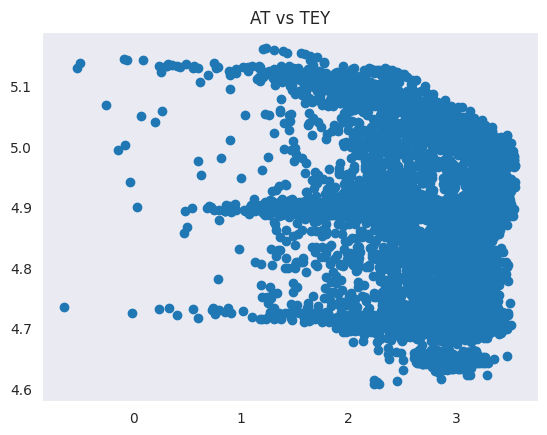

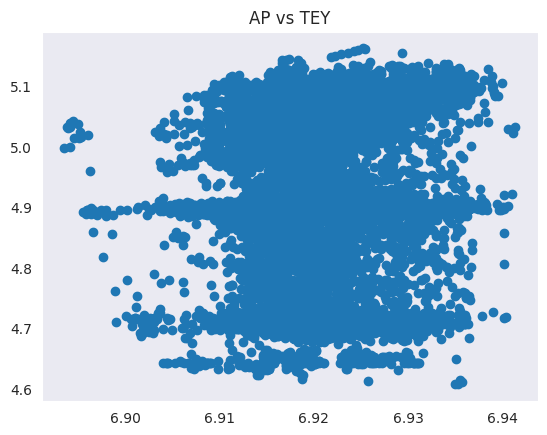

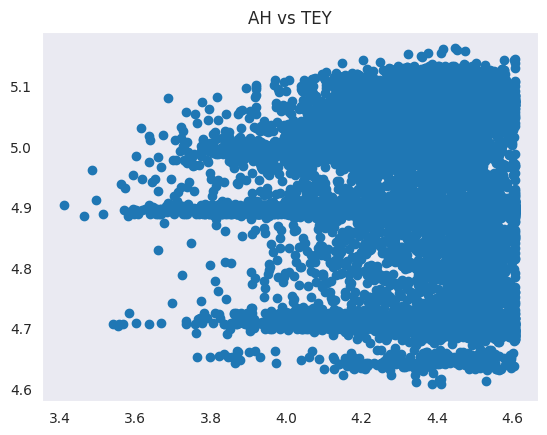

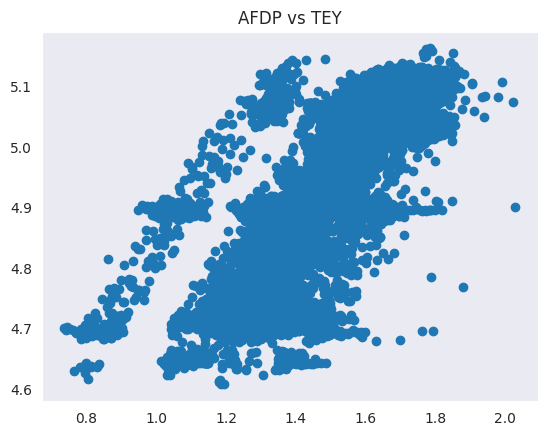

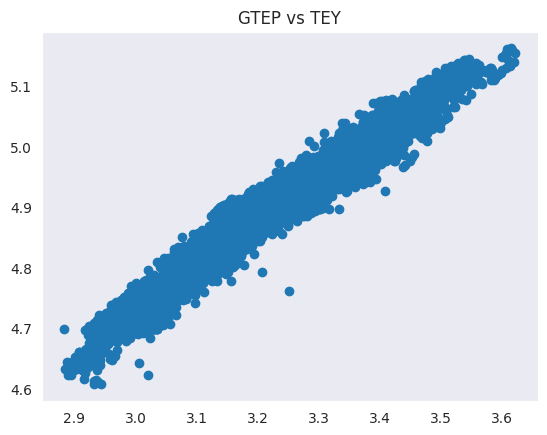

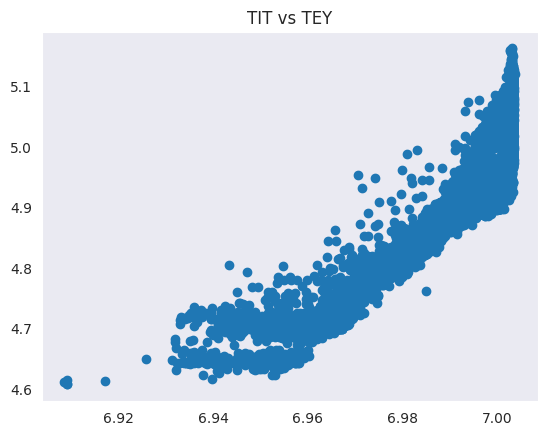

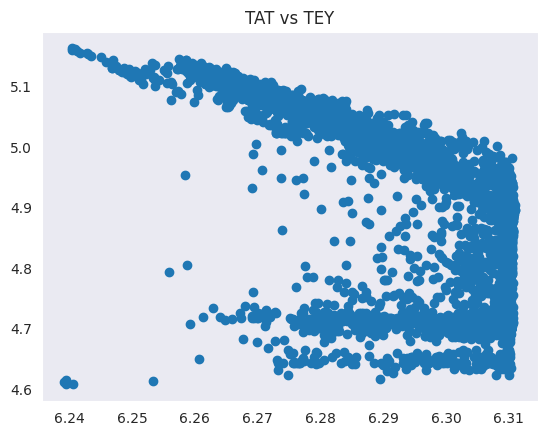

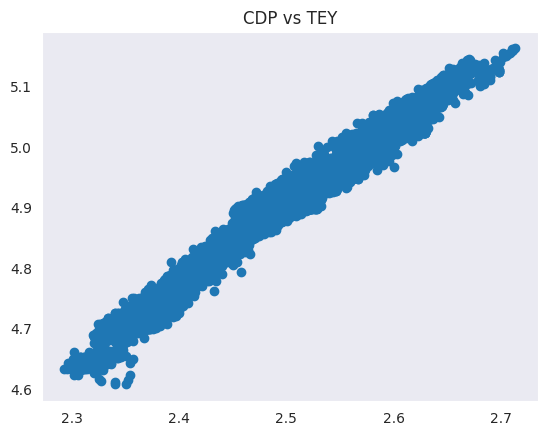

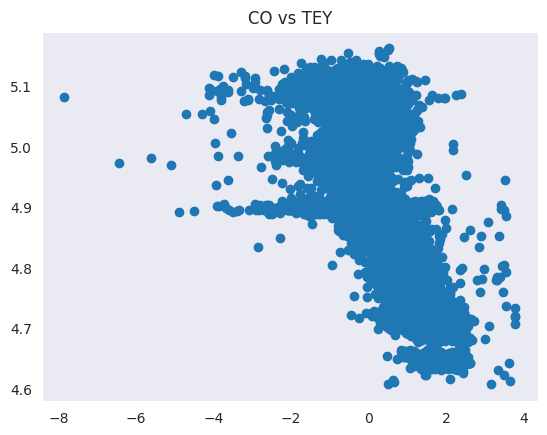

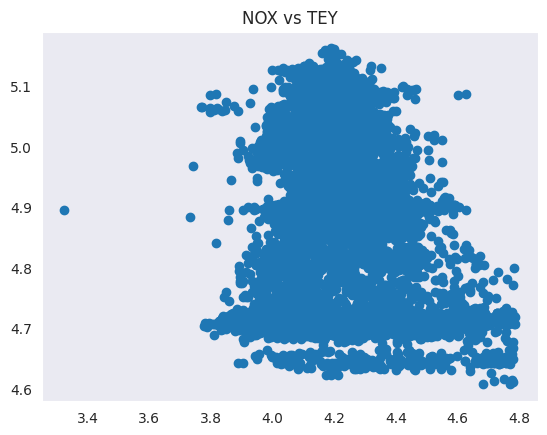

In [26]:
for i in gas.columns:
    if i != 'TEY':
         plt.scatter(np.log(gas[i]), np.log(gas['TEY']))
         plt.title(i+ ' vs TEY')
         plt.grid()
         plt.show()

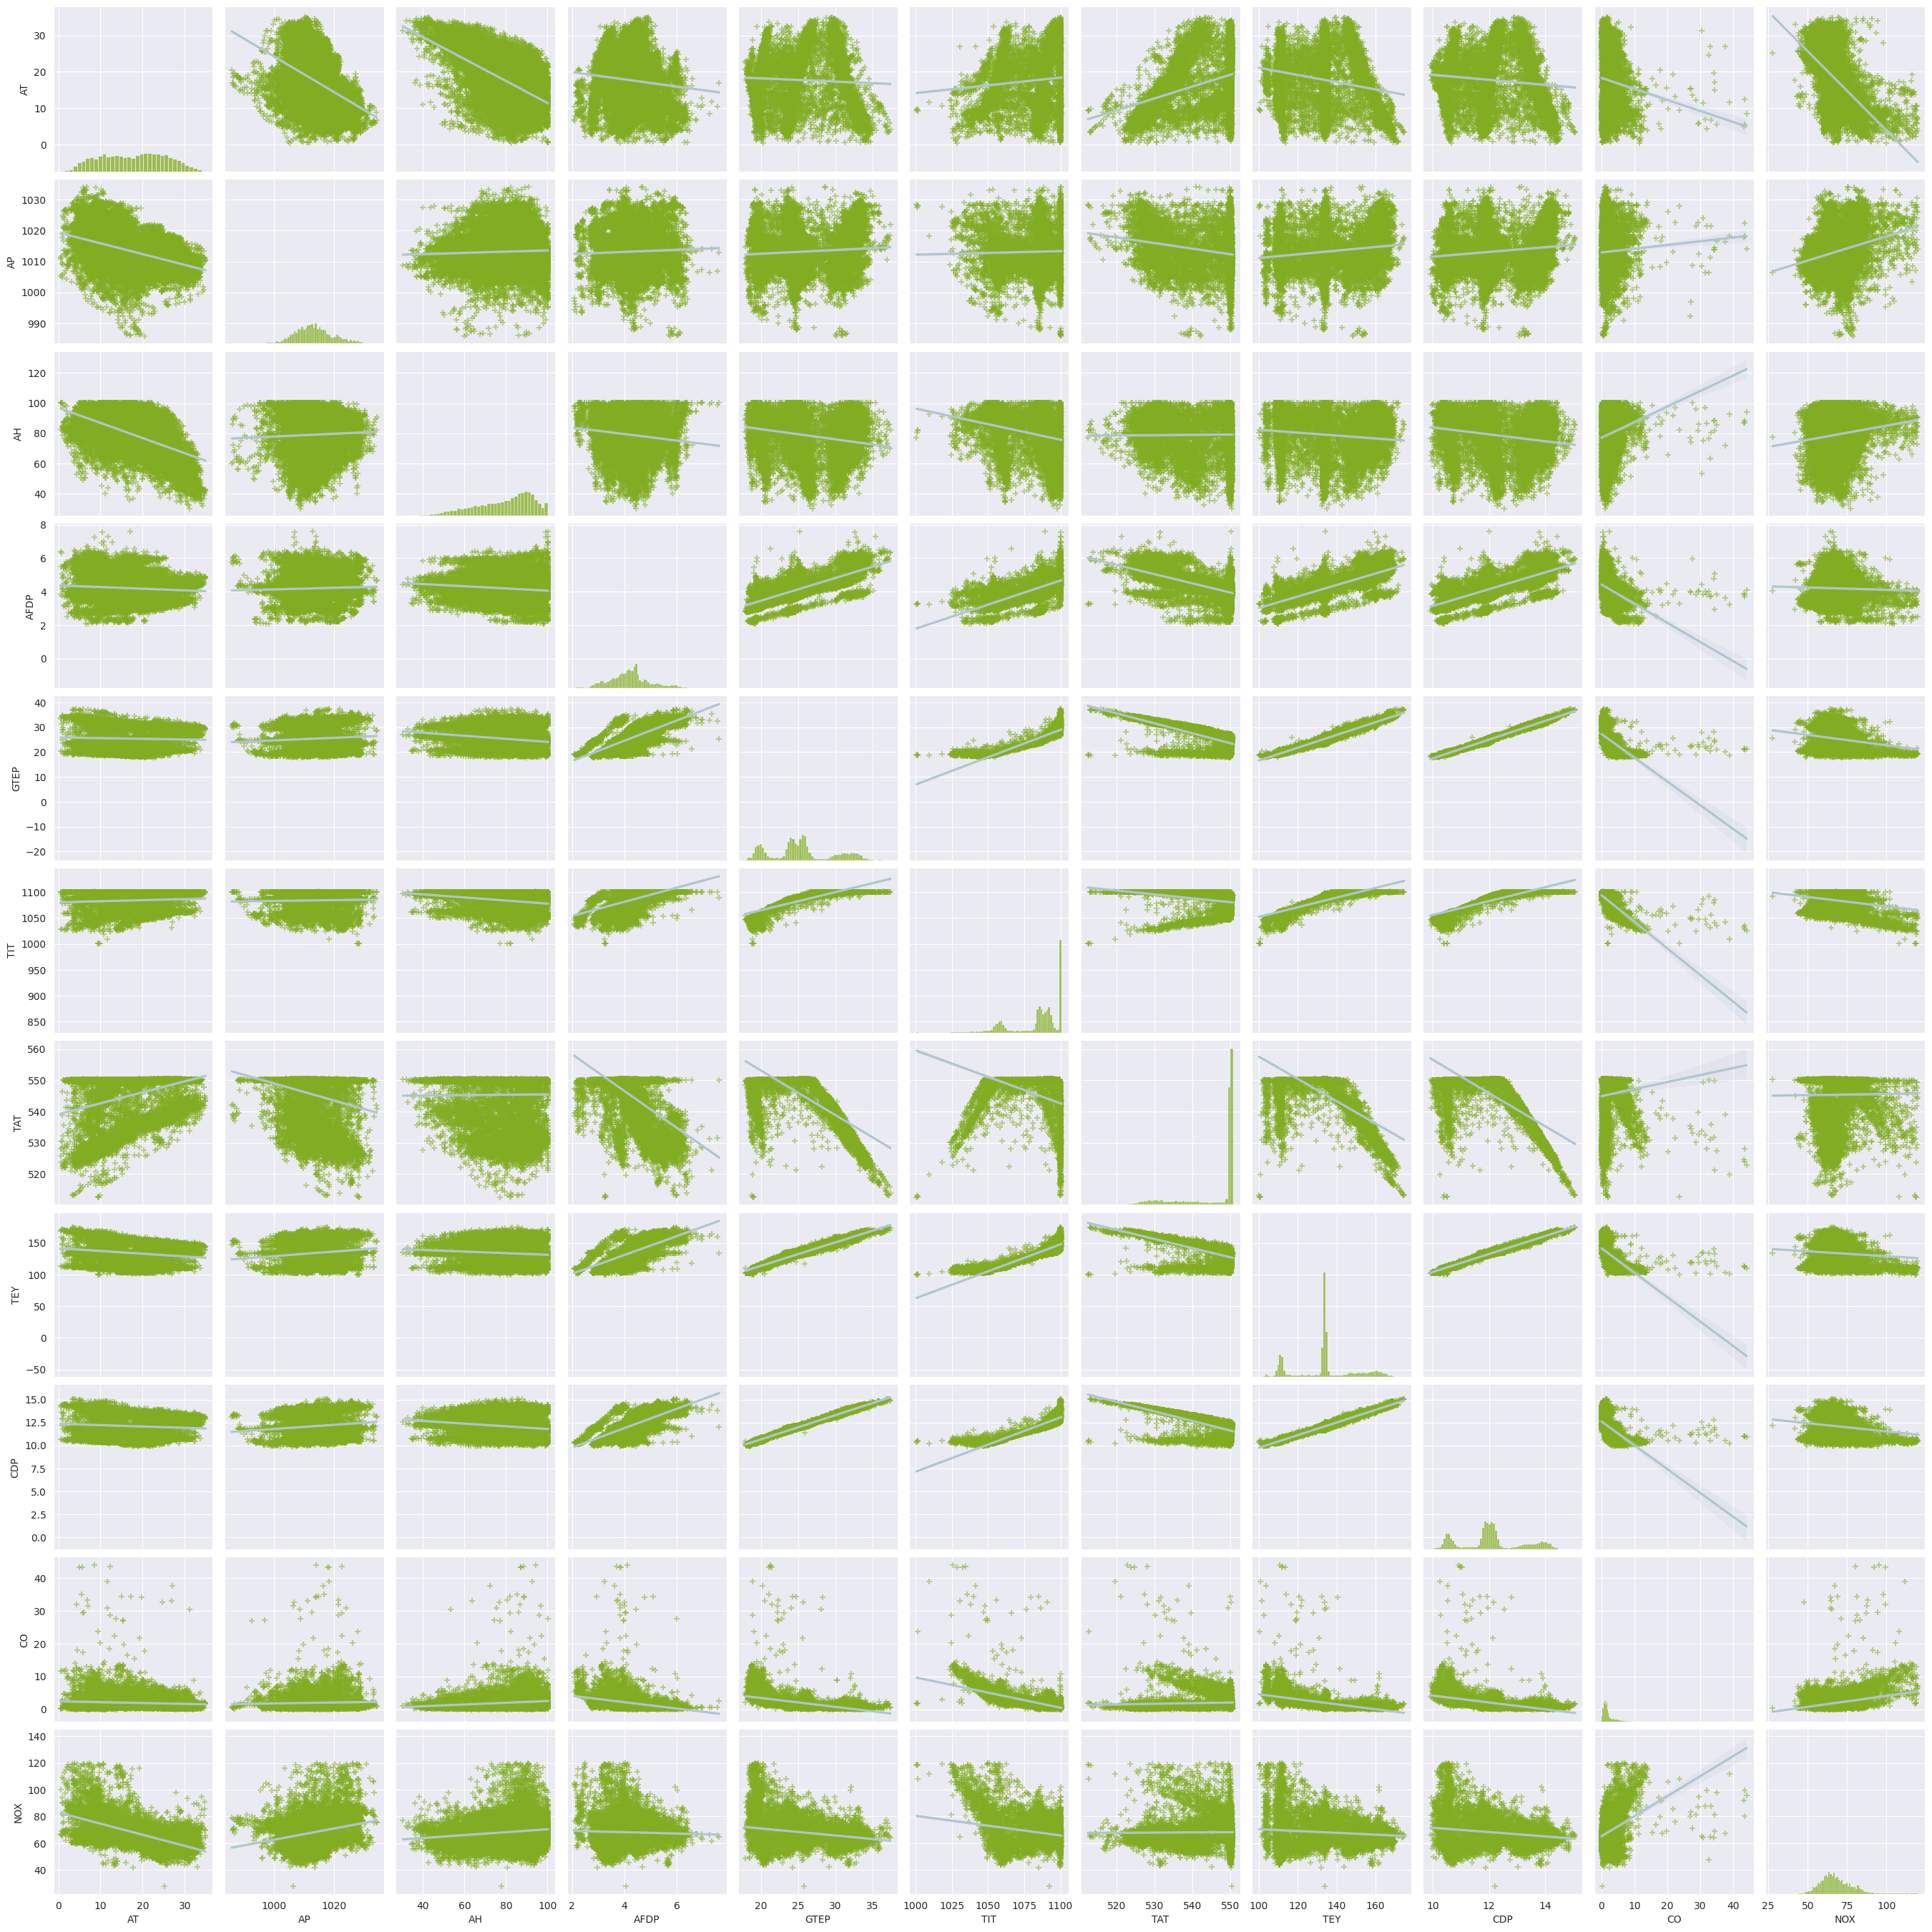

In [27]:
sns.pairplot(gas,markers="+",kind='reg',diag_kind="auto",plot_kws={'line_kws':{'color':'#aec5cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad23'}},
               
                 diag_kws= {'color': '#82ad23'})

<Figure size 2000x2000 with 0 Axes>

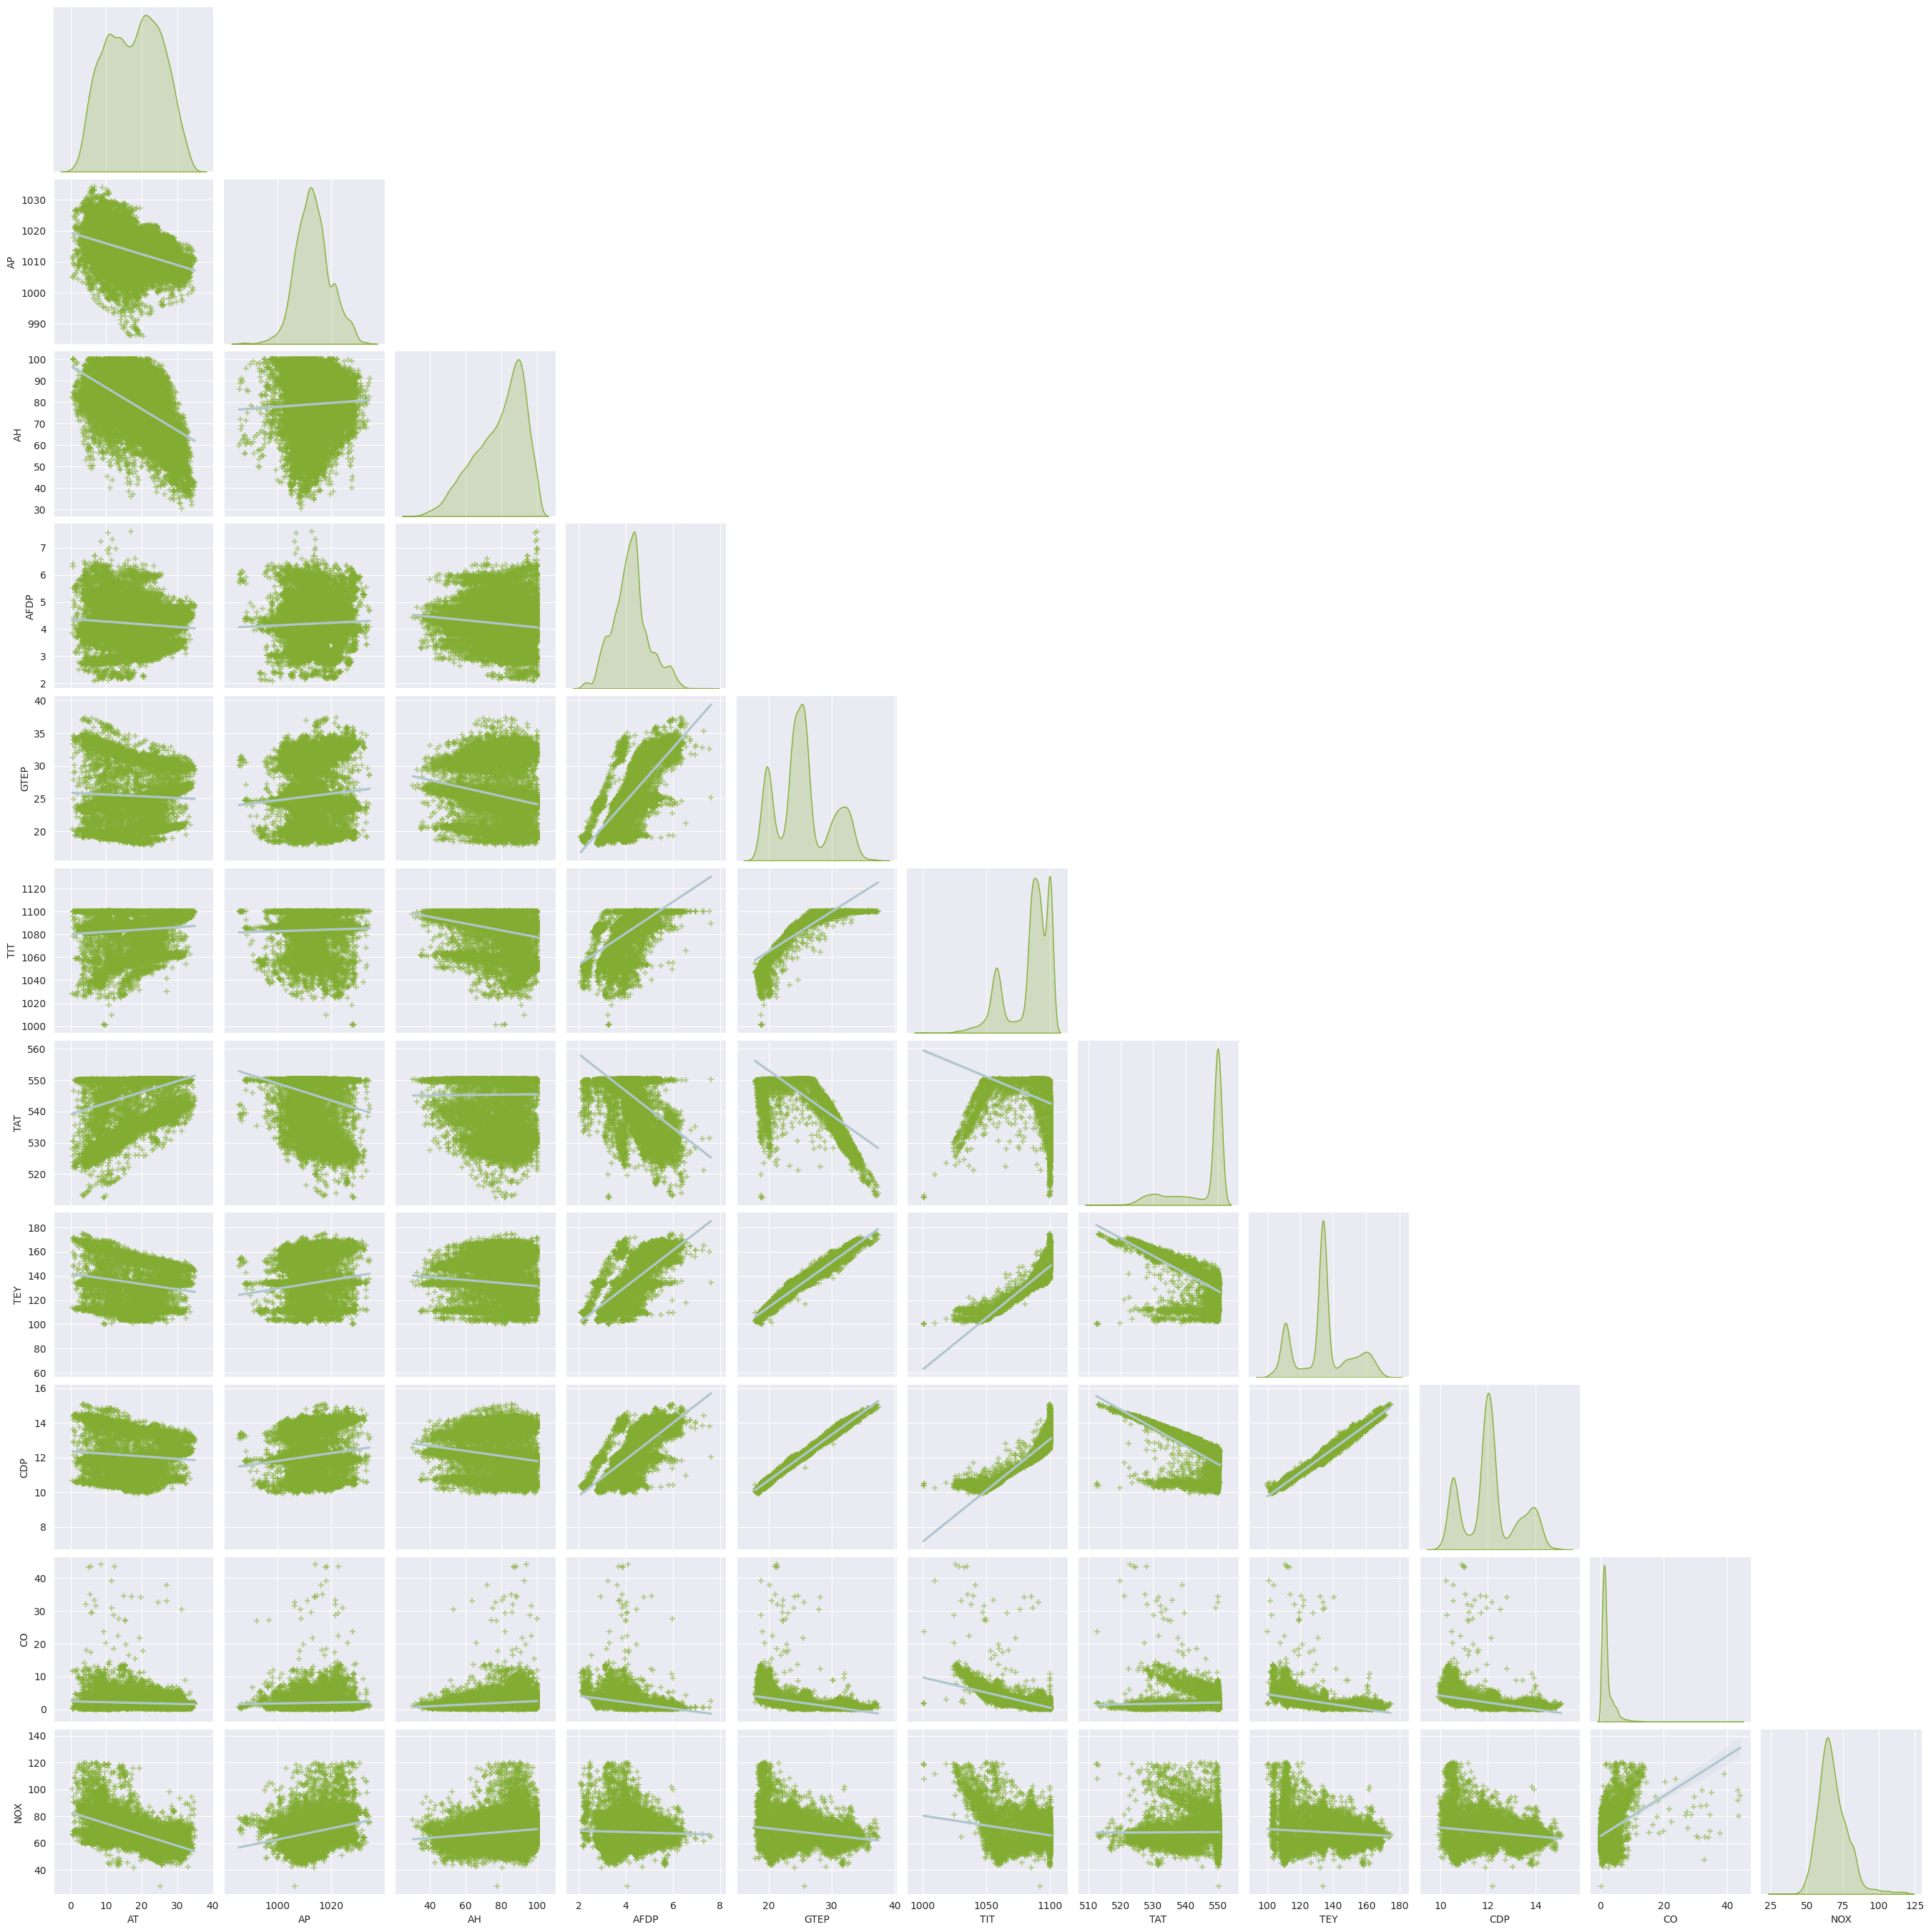

In [28]:
plt.figure(figsize=(20,20))
sns.pairplot(gas,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

<Axes: >

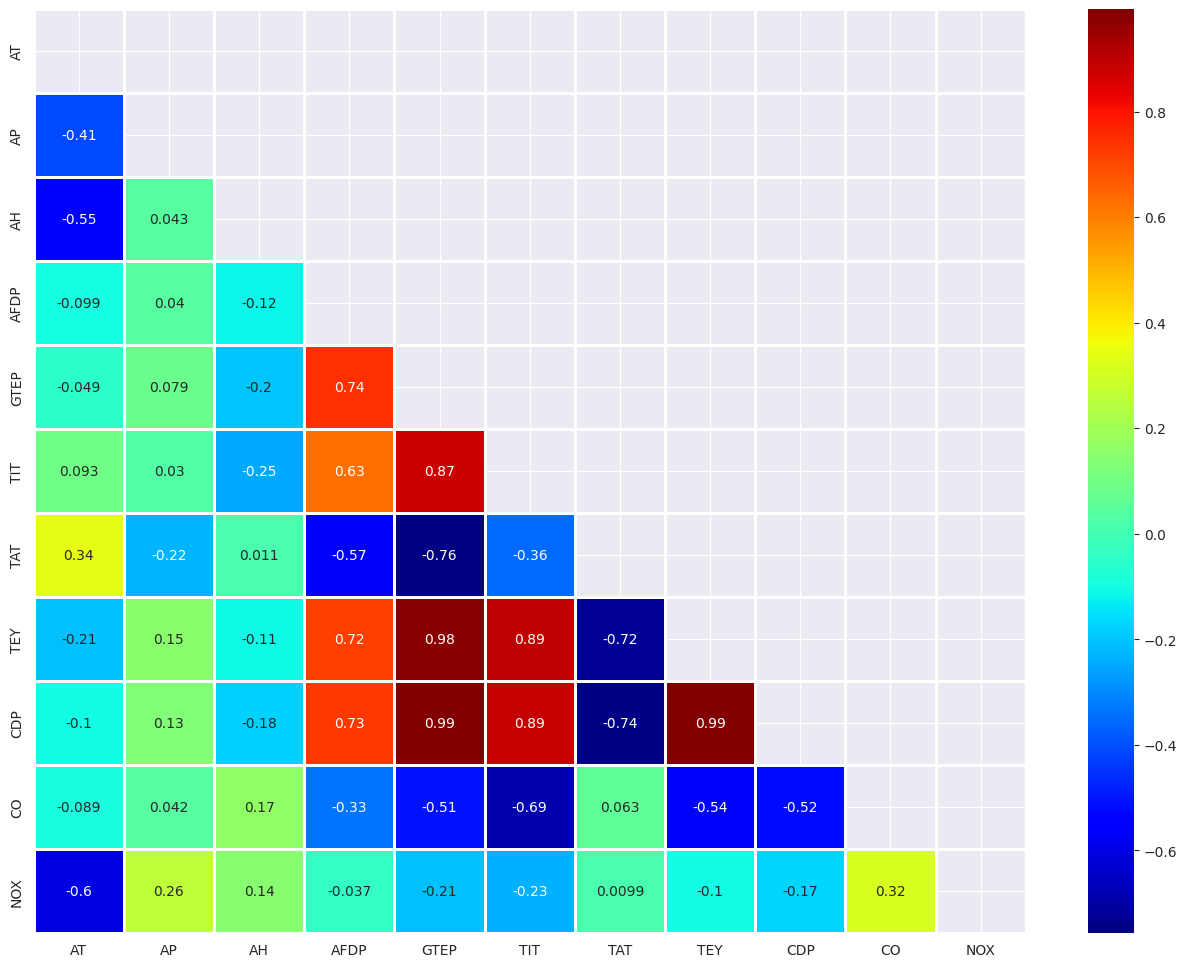

In [29]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(gas.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = gas.corr(),cmap='jet',annot = True , linewidths = 1, linecolor = 'white',mask = mask)

In [30]:
x = gas.drop('TEY',axis=1)
y = gas[['TEY']]

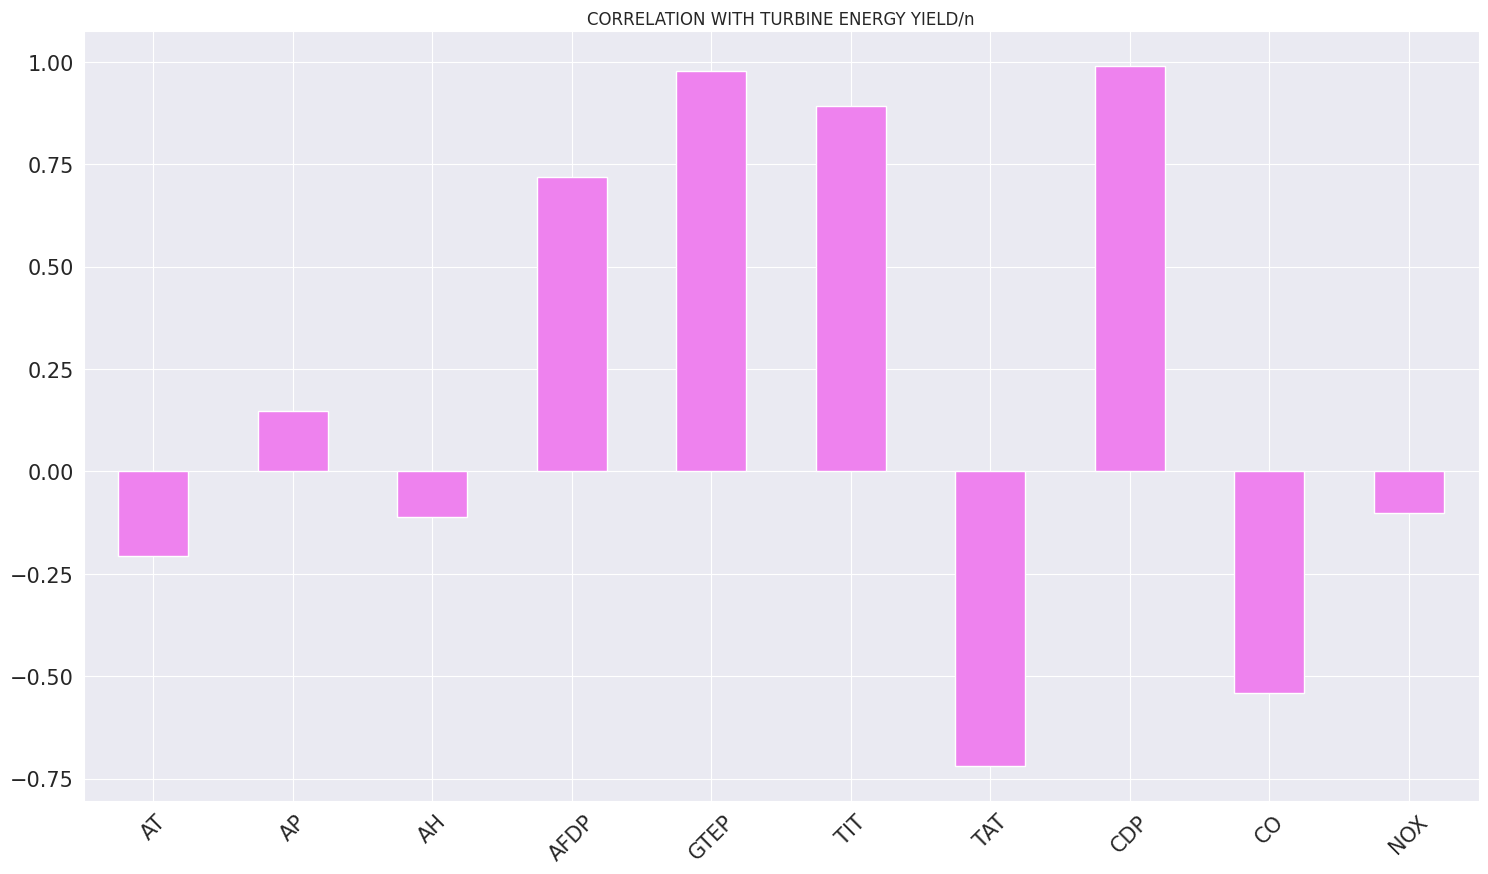

In [31]:
data = gas.copy()

correlation = data.corrwith(gas.TEY)
correlation = correlation[correlation!=1]
pos_correlation = correlation[correlation>0].sort_values(ascending = False)
pos_correlation = correlation[correlation<0].sort_values(ascending = False)

correlation.plot.bar(figsize=(18,10),fontsize = 15,color = 'violet', rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD/n')
horizontalalignment= ("center","fontstyle=Normal" "fontsize = 22", "fontfamily = sans-serif")

In [32]:
#feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
test = SelectKBest(score_func=mutual_info_regression, k ='all')
fit = test.fit(x,y)

#summarize scores
scores = fit.scores_
features = fit.transform(x)
scores_df = pd.DataFrame(list(zip(scores, x.columns)),columns = ['score','feature'])
scores_df.sort_values(by='score',ascending=False,inplace=True)
scores_df

score feature
7  1.713743     CDP
4  1.600358    GTEP
5  1.324355     TIT
6  0.891678     TAT
3  0.660796    AFDP
8  0.512251      CO
0  0.411837      AT
9  0.300831     NOX
1  0.137153      AP
2  0.097483      AH

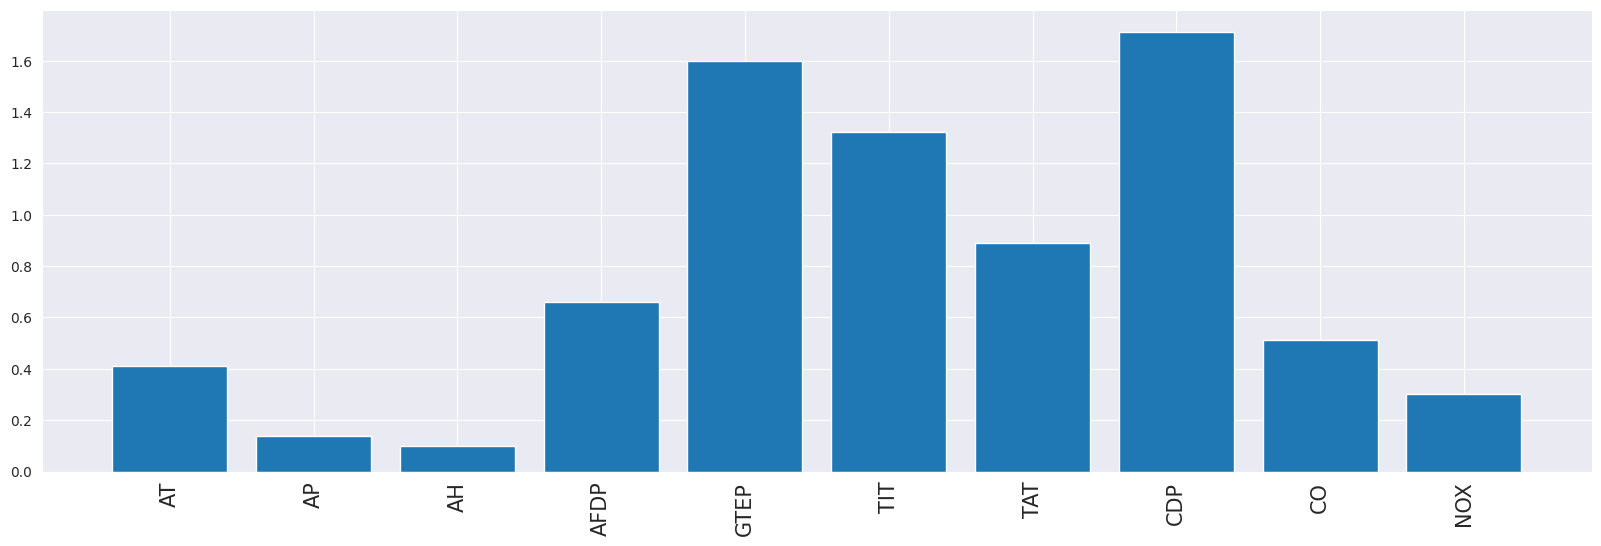

In [33]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

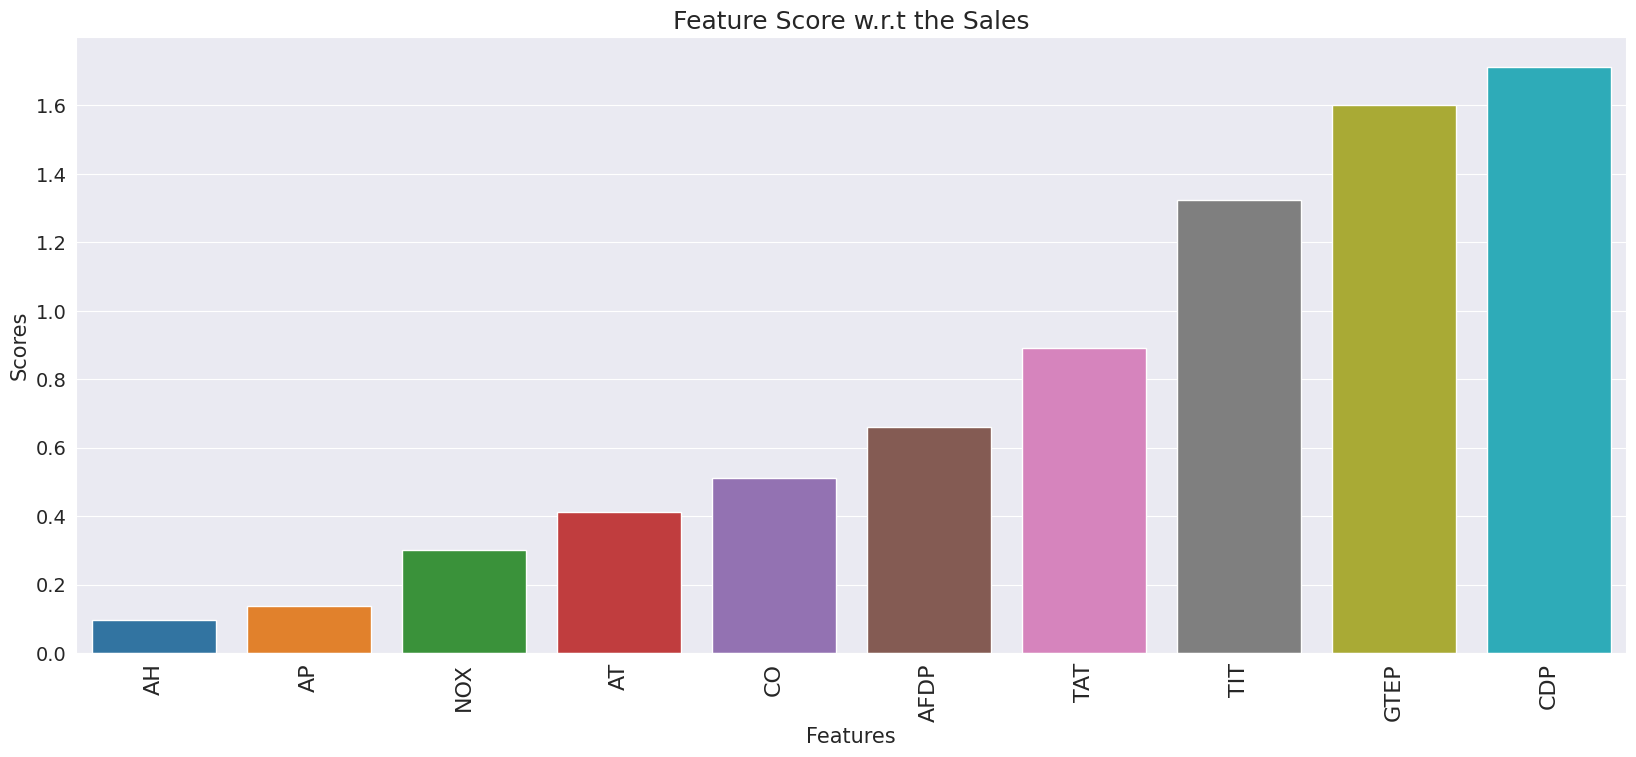

In [34]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='feature',
            y="score", 
            data=scores_df, 
            order=scores_df.sort_values('score').feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [35]:
scores_df.sort_values('score',ascending = False)

score feature
7  1.713743     CDP
4  1.600358    GTEP
5  1.324355     TIT
6  0.891678     TAT
3  0.660796    AFDP
8  0.512251      CO
0  0.411837      AT
9  0.300831     NOX
1  0.137153      AP
2  0.097483      AH

In [36]:
model_data = data[['CDP','GTEP','TIT','TAT','AFDP','CO','AT','TEY']]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

In [37]:
continous_feature = [feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continous Feature Count {}'.format(len(continous_feature)))

Continous Feature Count 8


In [39]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continous_feature]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

In [41]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [42]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [44]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [45]:
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [46]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [47]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
tuner.search(x_train,y_train,epochs = 100,validation_data=(x_test,y_test))

In [ ]:
tuner.results_summary()

• Hyperparameter Tuning: Optimal Batch_size, Number of Epochs


In [56]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [57]:
from sklearn.model_selection import GridSearchCV
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [58]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.078 total time=  11.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.051 total time=  11.9s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.087 total time=  13.4s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.059 total time=  23.8s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.039 total time=  22.5s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [59]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.03134114779531956, using {'batch_size': 50, 'epochs': 200}
-0.06281824111938476,0.01759244445056966 with {'batch_size': 10, 'epochs': 10}
-0.037297184392809865,0.007425500020188802 with {'batch_size': 10, 'epochs': 50}
-0.03470615185797214,0.006972179466238391 with {'batch_size': 10, 'epochs': 100}
-0.036901753023266794,0.008034558047523935 with {'batch_size': 10, 'epochs': 200}
-0.038758252561092374,0.006395083293333234 with {'batch_size': 20, 'epochs': 10}
-0.03757876679301262,0.0029102026982282454 with {'batch_size': 20, 'epochs': 50}
-0.03366169333457947,0.0018568150806636812 with {'batch_size': 20, 'epochs': 100}
-0.031395043805241586,0.0026171476708050237 with {'batch_size': 20, 'epochs': 200}
-0.042618077248334885,0.00831127484363615 with {'batch_size': 40, 'epochs': 10}
-0.0431673027575016,0.010200316437290113 with {'batch_size': 40, 'epochs': 50}
-0.03619728982448578,0.005626750862438912 with {'batch_size': 40, 'epochs': 100}
-0.03282360136508942,0.004105521328493989 w

• Hyperparameter Tuning: Optimal Droupout rate

In [60]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [61]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [62]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time= 1.4min
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time=  52.4s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.034 total time=  54.5s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.026 total time=  55.3s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time= 1.4min
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [63]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.02771802768111229, using {'dropout_rate': 0.3}
-0.02955763079226017,0.0027254128541935856 with {'dropout_rate': 0.0}
-0.035017774999141695,0.006794456303786279 with {'dropout_rate': 0.1}
-0.03240782283246517,0.004052033379730594 with {'dropout_rate': 0.2}
-0.02771802768111229,0.001264654926939013 with {'dropout_rate': 0.3}
-0.031428347900509836,0.004084436779709482 with {'dropout_rate': 0.4}
-0.031249214708805085,0.004857804649448315 with {'dropout_rate': 0.5}


• Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [64]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [65]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [66]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.814 total time= 1.4min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.682 total time= 1.4min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.772 total time= 1.4min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.667 total time= 1.1min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.912 total time= 1.4min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [67]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.6380558043718338, using {'activation_function': 'tanh', 'init': 'zero'}
-0.7693716049194336,0.08982532322512998 with {'activation_function': 'softmax', 'init': 'normal'}
-0.7158838629722595,0.054798574794393796 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.7417952179908752,0.04865689659942686 with {'activation_function': 'softmax', 'init': 'zero'}
-0.6913613319396973,0.020352521732740717 with {'activation_function': 'tanh', 'init': 'normal'}
-0.7534055471420288,0.07880259901421752 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.6380558043718338,0.2277014766622022 with {'activation_function': 'tanh', 'init': 'zero'}
-0.860271406173706,0.04890087493333645 with {'activation_function': 'relu', 'init': 'normal'}
-0.7606047511100769,0.05188529083669413 with {'activation_function': 'relu', 'init': 'uniform'}
-0.762270474433899,0.08634599526997531 with {'activation_function': 'relu', 'init': 'zero'}


• Model Building Neural Networks

• Standardizing only predictor variable - after train test split

In [ ]:
model_data

In [ ]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

In [ ]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

In [ ]:
from keras.models import Sequential

In [ ]:
def toFindBestParams(x_train_scaled,y_train,x_test_scaled,y_test):
    batch_size_list = [5,10,15,20]
    epoch_list = [5,10,50,100]
    
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            model = Sequential()
            model.add(Dense(units=50,input_dim=x_train_scaled.shape[1], activation='relu'))
            model.add(Dense(units = 20))
            model.add(Dense(1))
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            mape = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-mape]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-mape)
            
    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

In [ ]:
model.compile(optimizer = 'adam',loss='mean_squared_error')
model.fit(x_train_scaled, y_train, batch_size=20,epochs=100,verbose=0)

In [ ]:
# generating predictions for test data
y_pred_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
pred_df = pd.DataFrame(x_test)
pred_df['Actual'] = y_test
pred_df['Predicted'] = y_pred_test
print(pred_df.shape)
pred_df.head(10)

In [ ]:
pred_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [ ]:
APE=100*(abs(pred_df['Actual']-pred_df['Predicted'])/pred_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
pred_df['APE %']=APE
pred_df.head()

In [ ]:
pred_df['Error'] = (pred_df['Actual'] - pred_df['Predicted'])/(pred_df['Actual'])
pred_df.reset_index(drop = True)

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(pred_df['Actual'], pred_df['Predicted'])

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_pred_train))
print('R2_score (test): ',r2_score(y_test, y_pred_test))

In [ ]:
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_pred_test)*100,2))) 

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_pred_test,bins=50)

In [ ]:
import statsmodels.api as smf
smf.qqplot(pred_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()